In [1]:
import os 
os.getcwd()

'/content'

**Mount drive to interface Google Colab and My Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the path to Colab Notebook folder present inside the Google My Drive

In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
%cd Assignments

/content/drive/My Drive/Colab Notebooks/Assignments


In [4]:
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
import pandas as pd
data=pd.read_csv(url,delim_whitespace=True)

To save the csv file in to our drive

In [ ]:
data.to_csv('Diabetes Progression.csv')

In [5]:
ls

'Diabetes Progression.csv'


In [6]:
data.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [7]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [9]:
data.shape

(442, 11)

In [10]:
col_lis=data.columns

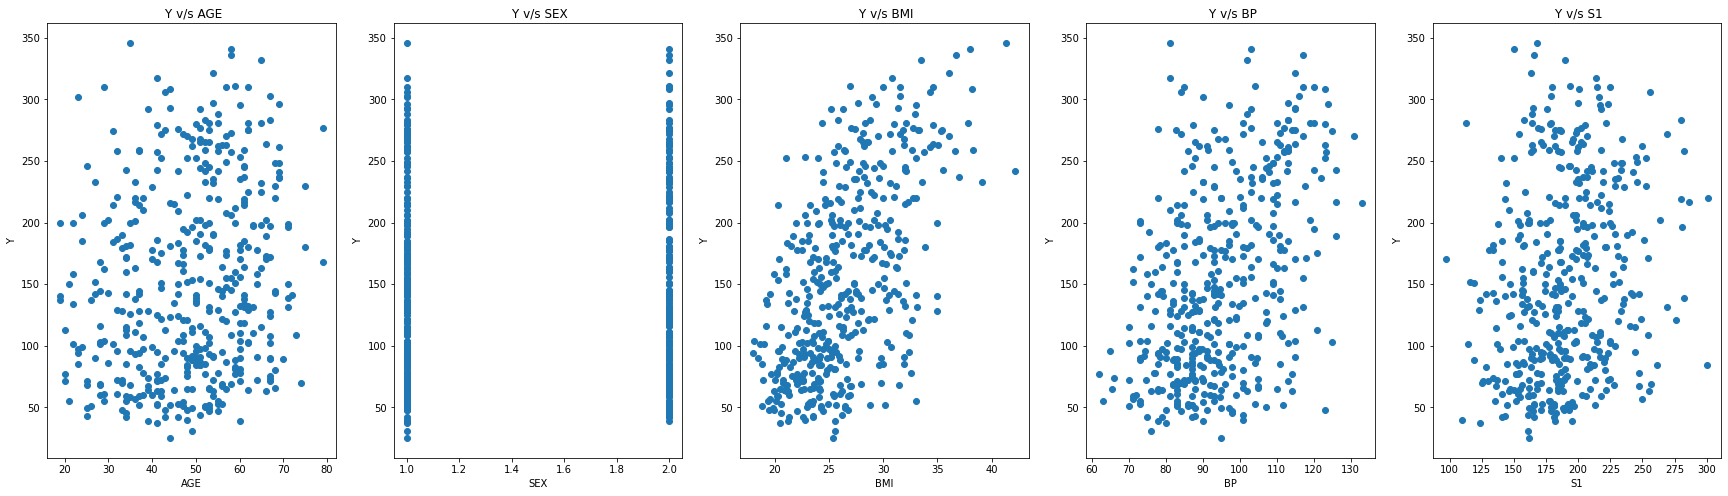

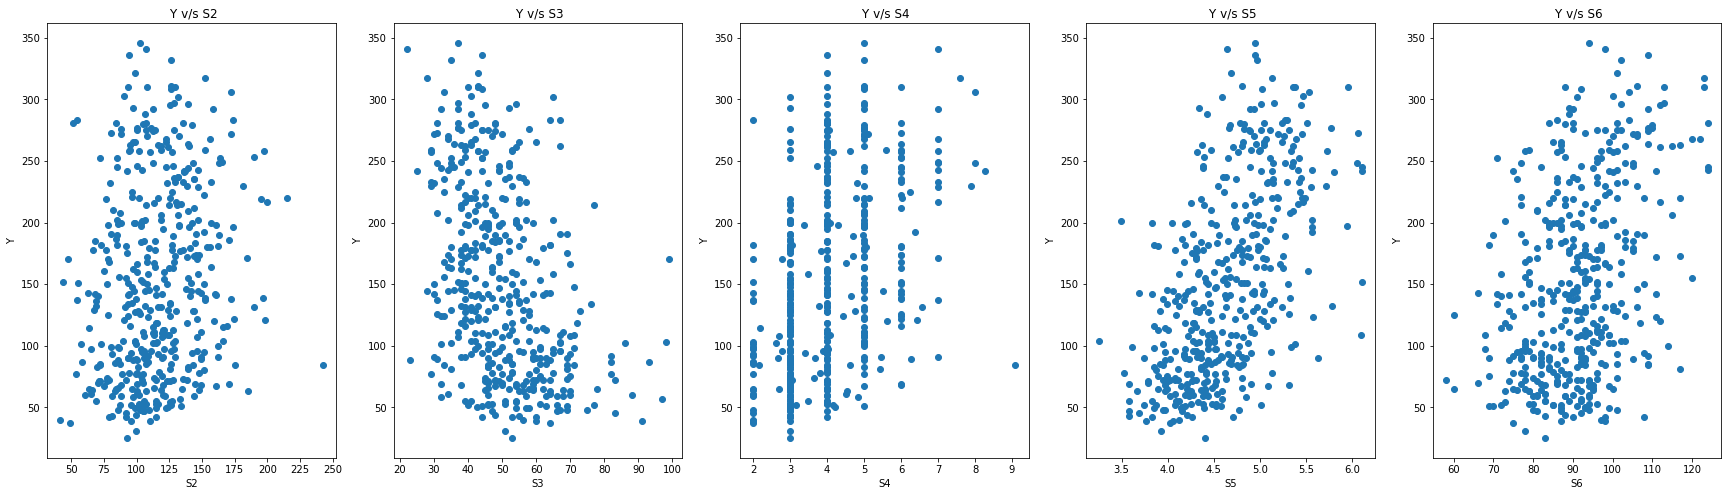

In [11]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,5,figsize=(30,8))
for i in range(0,5):
  Y=data['Y']
  X=data[col_lis[i]]
  axes[i].set_xlabel(col_lis[i])
  axes[i].set_ylabel("Y")
  axes[i].set_title(" Y v/s "+ col_lis[i])
  axes[i].scatter(X,Y)
  j=i

fig,axes=plt.subplots(1,5,figsize=(30,8)) 
for i in range(0,5):
  Y=data['Y']
  X=data[col_lis[j+1]]
  axes[i].set_xlabel(col_lis[j+1])
  axes[i].set_ylabel("Y")
  axes[i].set_title(" Y v/s "+ col_lis[j+1])
  axes[i].scatter(X,Y)
  j+=1
  
  

In [12]:
correlation=data.corr()

In [13]:
correlation

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


From the above it is clear that Correlation of Y with {BMI,S5,BP,S4,S3} features are High. Along with that BMI feature is also closely correlated with S5,BP,S4 and S3

**So let's choose BMI fetaure for building the Simple Linear Regression Model**

In [14]:
Y=data['Y']
X=data['BMI']

Text(0, 0.5, 'Output Y')

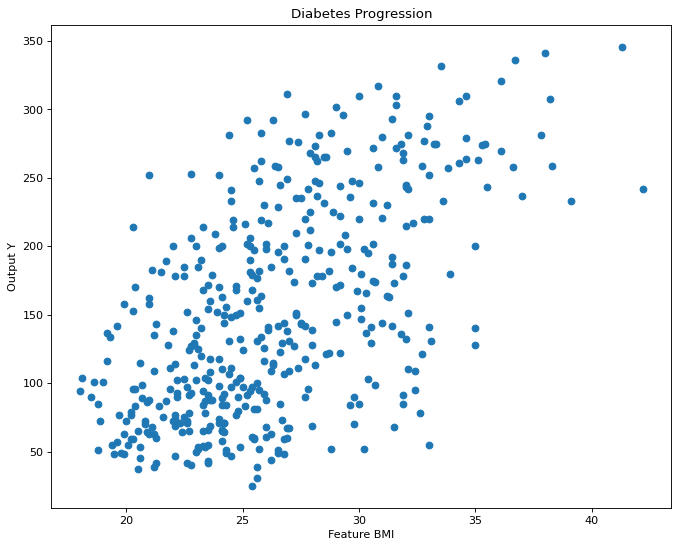

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)

plt.scatter(X,Y)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')

**Case 1: Learning Rate=0.0001 and Epochs =10 (No of iterations to reach gloabal minima using Gradient Descent Algo)**

M value is= 4.628048145916719 
 C value is= 0.16426763336185976
Mean Squarred Error= 5396.377809137523


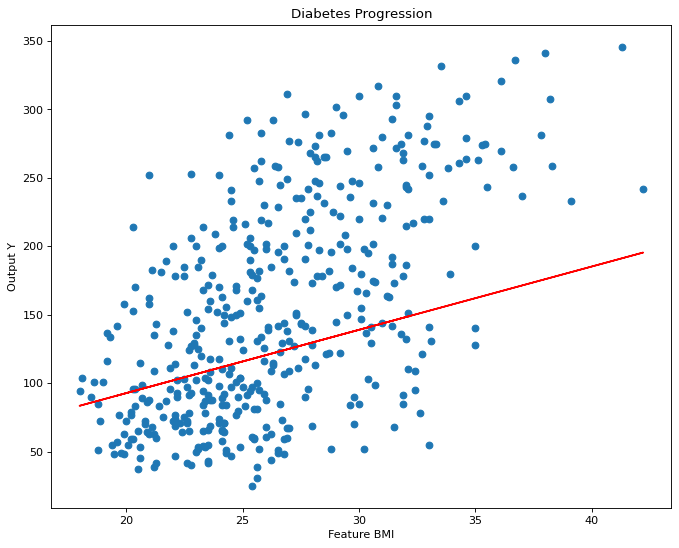

In [16]:
#Build the Model
X=data['BMI']
Y=data['Y']
n=len(Y)
m=0
c=0


lr_rate=0.0001
epochs=10

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')








**Case 2: Learning Rate=0.0001 and Epochs =50 (No of iterations to reach gloabal minima from Gradient Descent Algo)**

M value is= 5.879951055983925 
 C value is= 0.18473953974507792
Mean Squarred Error= 4269.3799885793305


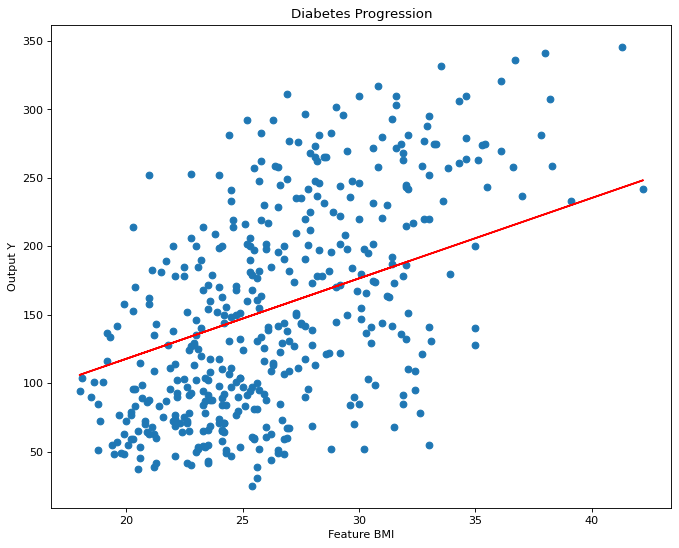

In [17]:
#Build the Model
X=data['BMI']
Y=data['Y']
n=len(Y)
m=0
c=0


lr_rate=0.0001
epochs=50

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')

**Case 3: Learning Rate=0.001 and Epochs =100 (No of iterations to reach gloabal minima)**

M value is= 5.904960901133554 
 C value is= -0.4231205527415602
Mean Squarred Error= 4265.4793688356685


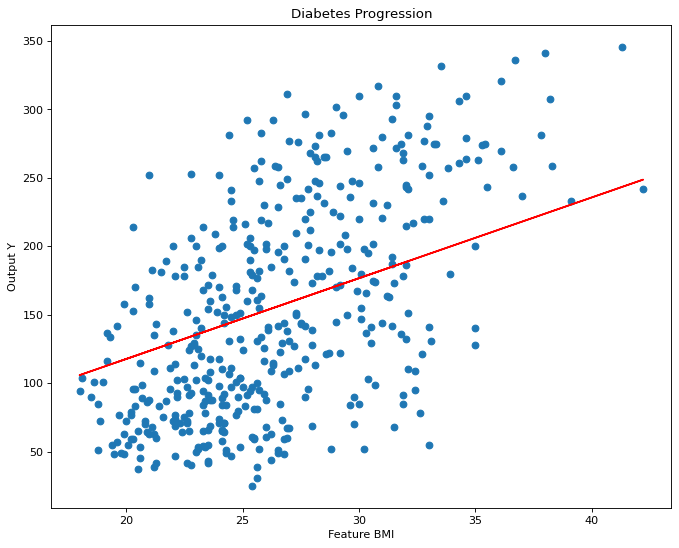

In [18]:
#Build the Model
X=data['BMI']
Y=data['Y']
n=len(Y)
m=0
c=0


lr_rate=0.001
epochs=100

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')

**Case 4: Learning Rate=0.001 and Epochs =1000 (No of iterations to reach gloabal minima)**

M value is= 6.11173723966513 
 C value is= -6.029478710940872
Mean Squarred Error= 4230.502216235833


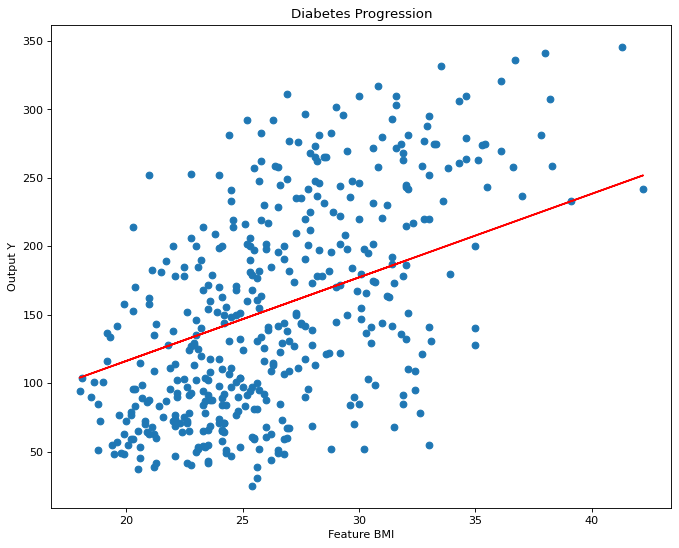

In [19]:
#Build the Model
X=data['BMI']
Y=data['Y']
n=len(Y)
m=0
c=0


lr_rate=0.001
epochs=1000

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')

**Building Simple Linear Regression Model With Pre Processing Of Data**

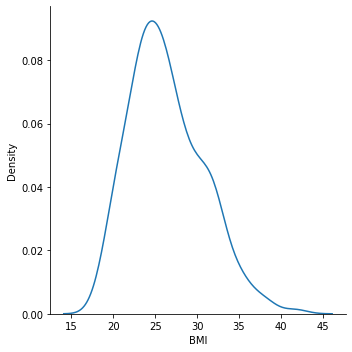

In [22]:
import seaborn as sns
sns.displot(data=data,x=data['BMI'],kind='kde')

In [25]:
data['BMI'].describe()

count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64

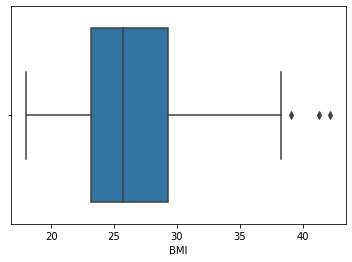

In [23]:
sns.boxplot(data=data,x=data['BMI'])

**Remove Outlier Using IQR Method**

In [29]:
q1=23.2
q3=29.275
IQR=(q3-q1)

In [30]:
lowbound=q1-(1.5*IQR)
uppbound=q3+(1.5*IQR)

In [33]:
X=data['BMI']
Y=data['Y']
X_n=[]
Y_n=[]
for i in range(len(X)):
  if X[i]>uppbound or X[i]<lowbound:
    continue
  else:
    X_n.append(X[i])
    Y_n.append(Y[i])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


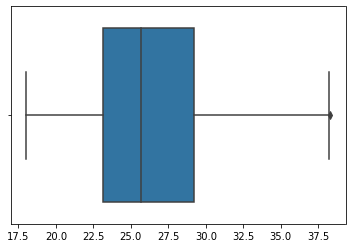

In [36]:
sns.boxplot(X_n)

In [41]:
X=pd.Series(X_n)
Y=pd.Series(Y_n)

**Standarization Formula whose mean will be 0 and standard deviation will be 1 after performing standardization**

In [42]:
X=(X-X.mean())/(X.std())
Y=(Y-Y.mean())/(Y.std())

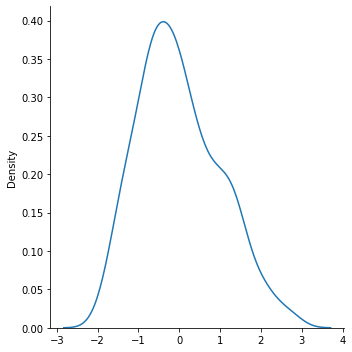

In [46]:
sns.displot(X,kind='kde')

In [47]:
X.describe()

count    4.390000e+02
mean    -5.075667e-15
std      1.000000e+00
min     -1.940434e+00
25%     -7.330500e-01
50%     -1.352189e-01
75%      6.853336e-01
max      2.818770e+00
dtype: float64

# **For Standarized Dataset Applying Gradient Descent Algorithm**

**Case 1 : Learning Rate=0.001 and Epochs =100**

M value is= 0.1046726547402655 
 C value is= 6.925566169648062e-17
Mean Squarred Error= 0.8879041279699665


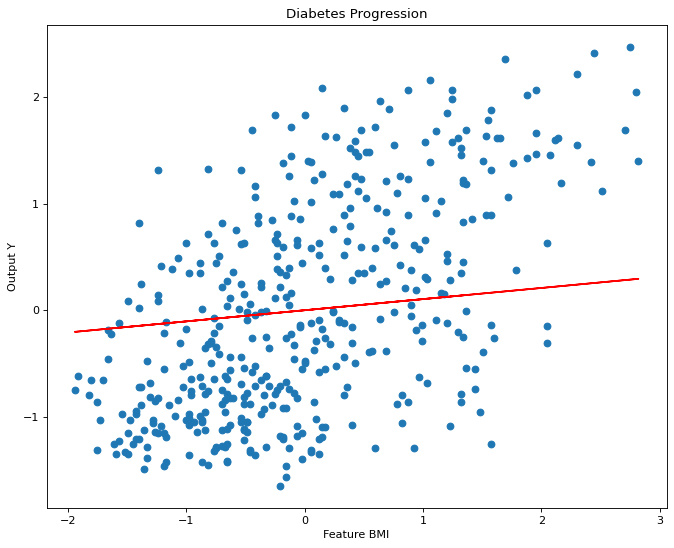

In [63]:
#Build the Model
n=len(Y)
m=0
c=0


lr_rate=0.001
epochs=100

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')


**Case 2 : Learning Rate=0.01 and Epochs =1000**

M value is= 0.5781121076607144 
 C value is= 3.052182652404687e-15
Mean Squarred Error= 0.6642697920987606


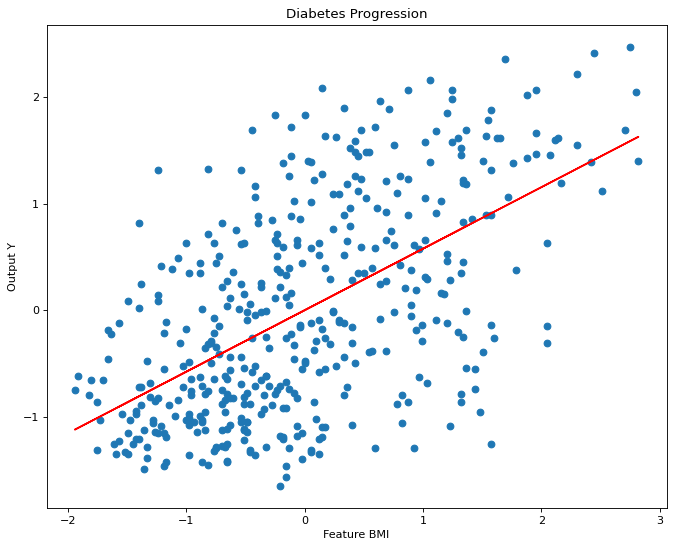

In [64]:
n=len(Y)
m=0
c=0


lr_rate=0.01
epochs=1000

for i in range(epochs):
  Y_pred=(m*X)+c
  Grad_des_m=(-2/n)*sum((Y-Y_pred)*X)
  Grad_des_c=(-2/n)*sum(Y-Y_pred)
  m=m-(lr_rate*Grad_des_m)
  c=c-(lr_rate*Grad_des_c)

print("M value is=",m,"\n","C value is=",c)
Y_pred=(m*X)+c
MS_error=(1/n)*sum((Y-Y_pred)**2)
print("Mean Squarred Error=",MS_error)

figure(figsize=(10, 8), dpi=80)
plt.title('Diabetes Progression')
plt.xlabel('Feature BMI')
plt.ylabel('Output Y')
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')

# **Conclusion**

**Without Standardization** : Learning Rate=0.001 is optimum with 100 or 
1000 epochs.

**With Standarization** : Learning Rate=0.01 is optimum with 1000 epochs.

**Standardizing the feature values**: It gives least mean squarred error and good accuracy compared to the values which are not standardized. Maps the dataset with good accuracy.

To train the model whose output are dependent on more than 1 features.Then, Multiple Regression is used.
 
